In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import matplotlib.pyplot as plt
import qgrid
#from nma_class import loader
from nma_class_Copy1 import loader

%matplotlib inline

In [2]:
# link to parent folder with all datasets
#main_folder = "/content/gdrive/My Drive/3 Projekte/Neuromatch Summer School/Projekt/steinmetz_dataset"
#main_folder = "C:/Users/User/Google Drive/3 Projekte/Neuromatch Summer School/Projekt/steinmetz_dataset"
#main_folder = "Z:/3 Projekte/Neuromatch Summer School/Projekt/steinmetz_dataset"
#main_folder = "E:/3 Projekte/Neuromatch Summer School/Projekt/steinmetz_dataset"
main_folder = '/Volumes/GoogleDrive/My Drive/NMA_Dataset/Dataset_1'


# initialize loader object
loader = loader(main_folder)

In [3]:
# get available sessions
all_session_folders, all_session_names = loader.get_available_session()

# Neuromatch Academy Project - Steinmetz Dataset - Mouse Mind Reading

In [4]:
# load default session = 
session = loader.load_session(all_session_folders[0])
#channels_df = session['channels_df']
spikes_df = session['spikes_df']
clusters_df = session['clusters_df']
trials_df = session['trials_df']

In [5]:
## alternatively you can also initizalize the loader object with the default session = first folder in main folder:

## initialize with default session
#loader = loader(main_folder, init_default=True)
#session = loader.default_session

# <font color='blue'>DFs: </font> 

<font color='green'>
1. clusters_df

2. spikes_df
    * (wheel mov vars)

    

3. trials_df 
    * all correct
    * only diff contrast
    * contrast=0 
    * print % 
    * plotting 
    
    
4. wheel_df
    * plots about wheel mov
    
</font>
    



# <font color='orange'>ToDo: </font> 

<font color='red'>
 * history of rew or repeated stim appearance
    
</font>

# <font color='red'>Spikes: </font> 

In [77]:
spikes_df.head()

,cluster,spike_times
0,527,0.003367
1,487,0.004733
2,243,0.006767
3,510,0.006933
4,435,0.007433


In [78]:
# Filter to visual areas, clusters = 220, 730, 867, 873, 884
spikes_VISp_df = spikes_df.loc[(spikes_df['cluster']==220) | (spikes_df['cluster']==730) 
                               | (spikes_df['cluster']==867) | (spikes_df['cluster']==873)
                               | (spikes_df['cluster']==884)]
spikes_VISp_df.head()

,cluster,spike_times
3604,730,2.498018
3646,730,2.508318
3883,730,2.566518
4608,730,2.750619
4729,873,2.786953


## <font color='blue'>Plot spike trains: </font> 


1) Plotting functions from Max: 
https://github.com/KceniaB/NMA_project/blob/master/README.md 

In [79]:
# 1) Plotting functions from Max: 
# https://github.com/KceniaB/NMA_project/blob/master/README.md 
from nma_class_Copy1 import eda

data = [spikes_df, clusters_df, trials_df]
params = dict()
params['sampling_rate'] = 20000

session_eda = eda(data, all_session_names[0], all_session_folders[0], params)

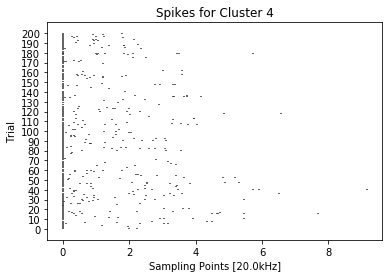

'\nThis means that Cluster 4 had the following spike times(xx) per trial(yy)\n'

In [80]:
# 1) Plotting functions from Max: 
# https://github.com/KceniaB/NMA_project/blob/master/README.md 
cluster = 4
spikes = clusters_df.loc[cluster, 'spikes']
trials_select_df = trials_df.loc[trials_df['included']==True, ['start time','end time']]
fig, ax = session_eda.plt_spike_train(cluster, spikes, trials_select_df)
plt.show()

'''
This means that Cluster 4 had the following spike times(xx) per trial(yy)
'''

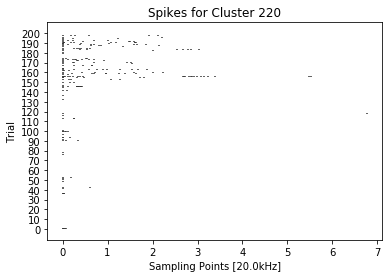

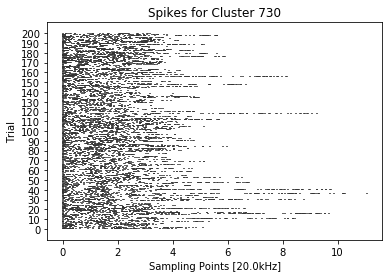

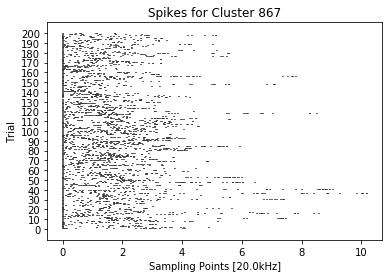

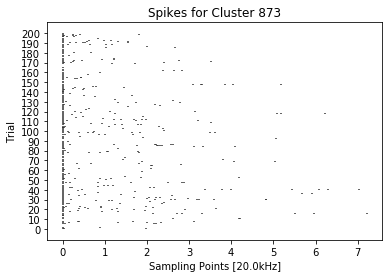

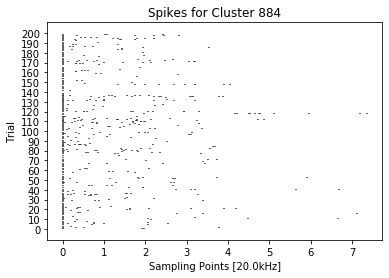

In [88]:
# 1) Plot for many clusters

cluster = [220, 730, 867, 873, 884]

for i in range(len(cluster)): 
    spikes = clusters_df.loc[cluster[i], 'spikes']
    trials_select_df = trials_df.loc[trials_df['included']==True, ['start time','end time']]
    fig, ax = session_eda.plt_spike_train(cluster[i], spikes, trials_select_df)
plt.show()

## <font color='blue'>Plot spike trains around event with histogram: </font> 


2) Plotting functions from Max: 
https://github.com/KceniaB/NMA_project/blob/master/README.md 

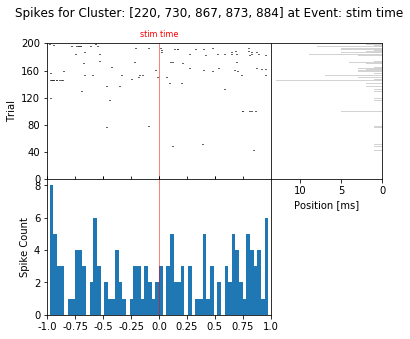

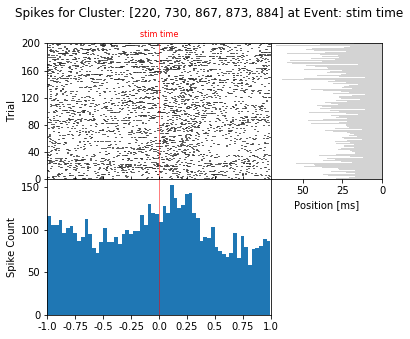

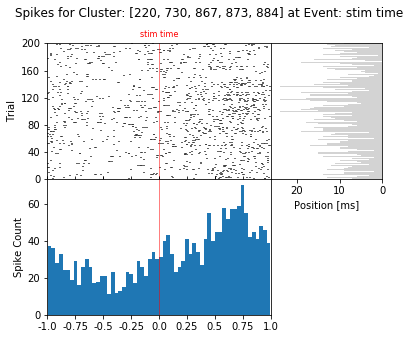

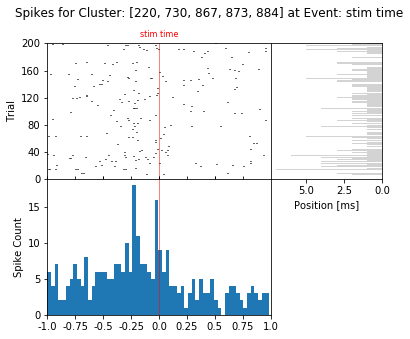

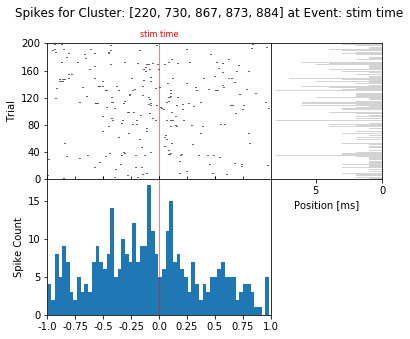

In [95]:
# 2) Plotting functions from Max: 
# https://github.com/KceniaB/NMA_project/blob/master/README.md 
title = None
cluster = [220, 730, 867, 873, 884]
event = 'stim time' #select the event to be time = 0 and plot the spikes around it
window = 1 #from -1 to 1 seconds if window = 1

for i in range(len(cluster)): 
    trials_select_df =  session['trials_df'].loc[session['trials_df']['included']==True, 'stim time']
    spikes = clusters_df.loc[cluster[i], 'spikes']
    fig, (ax1, ax2, ax3) = session_eda.plt_spike_train_hist_bar(cluster, event, window, trials_select_df, spikes)
plt.show()

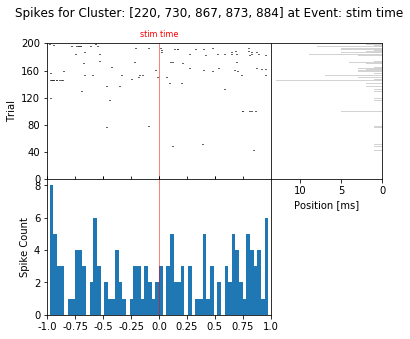

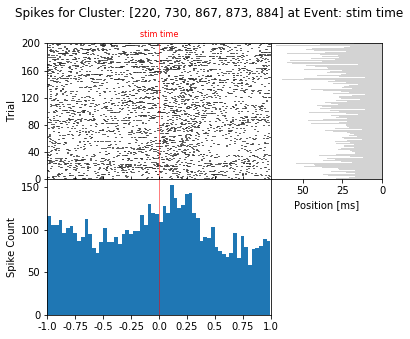

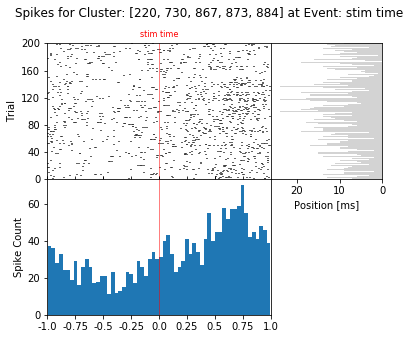

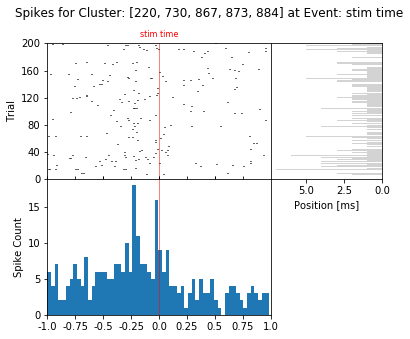

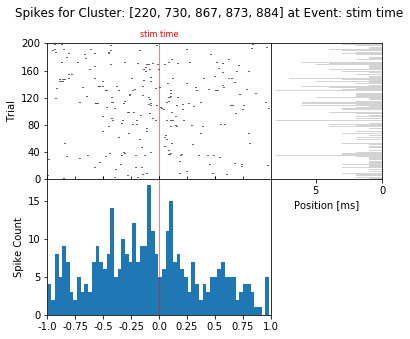

In [96]:
# 2) Plotting functions from Max: 
# https://github.com/KceniaB/NMA_project/blob/master/README.md 
title = None
cluster = [220, 730, 867, 873, 884]
event = 'stim time' #select the event to be time = 0 and plot the spikes around it
window = 1 #from -1 to 1 seconds if window = 1

for i in range(len(cluster)): 
    trials_select_df =  session['trials_df'].loc[session['trials_df']['included']==True, 'stim time']
    spikes = clusters_df.loc[cluster[i], 'spikes']
    fig, (ax1, ax2, ax3) = session_eda.plt_spike_train_hist_bar(cluster, event, window, trials_select_df, spikes)
plt.show()

# <font color='red'>Clusters: </font> 

In [7]:
clusters_df.head()

,label,spikes,total spikes,recording area
cluster,,,,
0,bad,"[0.8149, 14.822466666666667, 24.9646, 25.1436,...",826,ACA
1,bad,"[0.0281, 0.7068666666666666, 1.3172, 1.4209666...",2818,MOs
2,bad,"[77.22096666666667, 87.62533333333333, 87.7326...",3953,ACA
3,bad,"[16.713966666666668, 22.983266666666665, 89.84...",646,LS
4,mua,"[0.8383666666666667, 1.4296666666666666, 5.238...",5124,LS


In [28]:
# Filter to visual area
cluster_VISp_df = clusters_df.loc[(clusters_df['recording area']=='VISp')]
cluster_VISp_df = clusters_df.loc[(clusters_df['label']=='good')]

In [29]:
cluster_VISp_df

,label,spikes,total spikes,recording area
cluster,,,,
220,good,"[43.199466666666666, 43.4188, 43.9711666666666...",3007,MOs
730,good,"[2.498018061840694, 2.5083181079080767, 2.5665...",40331,SUB
867,good,"[2.9633534764059513, 2.9800202176153086, 3.841...",11907,SUB
873,good,"[2.7869526874461132, 3.765223729470552, 3.8315...",1688,DG
884,good,"[3.3348884714449456, 6.3309685382038605, 6.344...",2294,DG


# <font color='red'>Trials: </font> 

In [8]:
 trials_df.head()

,included,repetition number,start time,stim time,response time,feedback time,end time,stim contrast left,stim contrast right,response choice,feedback type,wheel movement
0,True,1,62.900284,65.269408,66.419612,66.456227,67.423484,1,0,1,1,"[0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0,..."
1,True,1,68.420838,71.202703,72.602206,72.640326,73.604476,0,0,-1,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,True,1,74.602902,76.052380,77.001671,77.038396,78.006757,1,0,1,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,True,1,79.003653,81.235263,83.502065,83.531699,84.506778,0,0,0,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,True,1,85.501795,86.800952,87.617727,87.628565,88.621336,0,1,1,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [101]:
trials_df['wheel movement'][8].shape

(2500,)

In [9]:
# 1. All correct 
# create new variable with true where all the trials are correct = 1
#all_correct = (trials_df['feedback type']==1)
#print(all_correct.head())

# https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values

# Create data frame only with the correct
correct_df = trials_df.loc[(trials_df['feedback type']==1)]
correct_df.head()


,included,repetition number,start time,stim time,response time,feedback time,end time,stim contrast left,stim contrast right,response choice,feedback type,wheel movement
0,True,1,62.900284,65.269408,66.419612,66.456227,67.423484,1,0,1,1,"[0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0,..."
1,True,1,68.420838,71.202703,72.602206,72.640326,73.604476,0,0,-1,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,True,1,74.602902,76.052380,77.001671,77.038396,78.006757,1,0,1,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,True,1,79.003653,81.235263,83.502065,83.531699,84.506778,0,0,0,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,True,4,102.902255,105.566451,107.663576,107.704085,108.663712,0,0,0,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [10]:
# 2. Create one df only for dif contrast trials and another for 0 and 0 

#2.1 diff contract trials
diff_contrasts_df = correct_df.loc[(correct_df['stim contrast left']!=(correct_df['stim contrast right']))]
diff_contrasts_df.head()

,included,repetition number,start time,stim time,response time,feedback time,end time,stim contrast left,stim contrast right,response choice,feedback type,wheel movement
0,True,1,62.900284,65.269408,66.419612,66.456227,67.423484,1,0,1,1,"[0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0,..."
2,True,1,74.602902,76.052380,77.001671,77.038396,78.006757,1,0,1,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,True,1,109.661966,111.066939,112.316606,112.353759,113.319761,1,0,1,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
13,True,1,132.848384,133.282493,134.615678,134.652514,135.620112,1,0,1,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
15,True,1,140.116488,143.097849,143.731404,143.767860,144.735296,0,1,-1,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [11]:
# 2. Create one df only for dif contrast trials and another for 0 and 0 

#2.2 same contrast 0
no_contrasts_df = correct_df.loc[(correct_df['stim contrast left']==0) & (correct_df['stim contrast right']==0)]
no_contrasts_df.head()

,included,repetition number,start time,stim time,response time,feedback time,end time,stim contrast left,stim contrast right,response choice,feedback type,wheel movement
1,True,1,68.420838,71.202703,72.602206,72.640326,73.604476,0,0,-1,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,True,1,79.003653,81.235263,83.502065,83.531699,84.506778,0,0,0,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,True,4,102.902255,105.566451,107.663576,107.704085,108.663712,0,0,0,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
10,True,1,114.318209,115.982617,116.832742,116.868631,117.834661,0,0,1,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
11,True,1,118.833840,123.716340,126.403458,126.433983,127.404783,0,0,0,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [12]:
all_t = len(trials_df)
crrct = len(correct_df)
cont = len(diff_contrasts_df)
nocont = len(no_contrasts_df)

df1 = ''
df1 = {'session name': " CHANGE ",
      'all trials': [all_t], 
      'correct trials': [crrct], 
      'diff contrast t': [cont], 
      'no contras': [nocont], 
      '%Correct': [round(crrct/all_t*100,2)], '%Contrast':[round(cont/crrct*100,2)], '% 0contrast':[round(nocont/crrct*100,2)]}

df2 = pd.DataFrame(data=df1)


print('Correct trials: ', crrct,'/',all_t, '->', round(crrct/all_t*100,2), '%')
print('Dif contrast trials: ', cont,'/',crrct, '->', round(cont/crrct*100,2), '%')
print('0 Contrast trials: ', nocont,'/',crrct, '->', round(nocont/crrct*100,2), '%')
df2

Correct trials:  141 / 214 -> 65.89 %
Dif contrast trials:  57 / 141 -> 40.43 %
0 Contrast trials:  84 / 141 -> 59.57 %


,session name,all trials,correct trials,diff contrast t,no contras,%Correct,%Contrast,% 0contrast
0,CHANGE,214,141,57,84,65.89,40.43,59.57


In [13]:
#add the different values per session 
# to initialize
#df3 = df2

In [14]:
#to keep adding
df3.append(df2) 

df3 

,session name,all trials,correct trials,diff contrast t,no contras,%Correct,%Contrast,% 0contrast
0,CHANGE,214,141,57,84,65.89,40.43,59.57


In [19]:
test = []

test = trials_df['stim time'] - trials_df['start time']

In [21]:
test
print(max(test))
print(min (test))

8.298038045912165
0.32721510941570386


In [68]:
#add new column to existing df

# creating a new column TRIAL_NUMBER, from the index
trials_df['trial_number'] = trials_df.index+1
trials_df.head()

,included,repetition number,start time,stim time,response time,feedback time,end time,stim contrast left,stim contrast right,response choice,feedback type,wheel movement,trial_number
0,True,1,62.900284,65.269408,66.419612,66.456227,67.423484,1,0,1,1,"[0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0,...",1
1,True,1,68.420838,71.202703,72.602206,72.640326,73.604476,0,0,-1,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
2,True,1,74.602902,76.052380,77.001671,77.038396,78.006757,1,0,1,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3
3,True,1,79.003653,81.235263,83.502065,83.531699,84.506778,0,0,0,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4
4,True,1,85.501795,86.800952,87.617727,87.628565,88.621336,0,1,1,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5


In [73]:
df_aligned = trials_df
df_aligned['startA'] = ""
df_aligned['stimA'] = ""
df_aligned['responseA'] = ""
df_aligned['feedbackA'] = ""
df_aligned['endA'] = ""

for i in range(0,len(df_aligned)):
    df_aligned['startA'][i] = df_aligned['start time'][i]-trials_df['start time'][i]
    #print(df_aligned['go cueA'][i])
    df_aligned['stimA'][i] = df_aligned['stim time'][i]-trials_df['start time'][i]
    #print(df_aligned['stim timeA'][i])
    df_aligned['responseA'][i] = df_aligned['response time'][i]-trials_df['start time'][i]
    df_aligned['feedbackA'][i] = df_aligned['feedback time'][i]-trials_df['start time'][i]
    df_aligned['endA'][i] = df_aligned['end time'][i]-trials_df['start time'][i]


    
    
    
    
    
    
#to test 
#df = pd.DataFrame(data) 
#df['C'] = ""
#for i in range(0,len(A)): 
#    df['C'][i] = B[i]-A[i]
#df

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path

In [74]:
min(df_aligned['stimA'])

0.32721510941570386

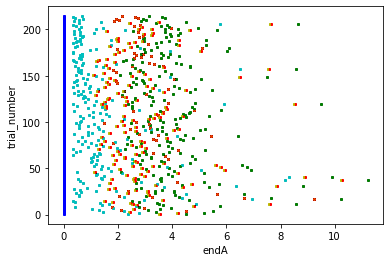

In [75]:
#scatter plot divided by colors according to visual stim, auditory cue, response (end of rotation), rew/norew, end of the trial
df = df_aligned

ax = plt.gca()
    
for i in range (1,len(df)):
    #df.plot.scatter(x='go cue', y='trial_number', s=0.2, c=np.where((df['response choice']==1), 'r', 'g'), marker='.', grid=False, ax=ax)
    df.plot.scatter(x='startA', y='trial_number', s=0.2, c='b', grid=False, ax=ax)
    df.plot.scatter(x='stimA', y='trial_number', s=0.2, c='c',grid=False, ax=ax)
    df.plot.scatter(x='responseA', y='trial_number', s=0.2, c='y', grid=False, ax=ax)
    df.plot.scatter(x='feedbackA', y='trial_number', s=0.2, c='r', grid=False, ax=ax)
    df.plot.scatter(x='endA', y='trial_number', s=0.2, c='g', grid=False, ax=ax)



#plt.savefig(...)
#fig=plt.figure(figsize=(50, 50))
plt.show()

In [21]:

#how to pick a new variable from dataset "session"
eye_area = session['eye_area']
eye_area
len(eye_area)

267759

In [22]:
wheel_position = session['wheel_position']
wheel_position

array([[    0.],
       [    0.],
       [    0.],
       ...,
       [17242.],
       [17242.],
       [17242.]])

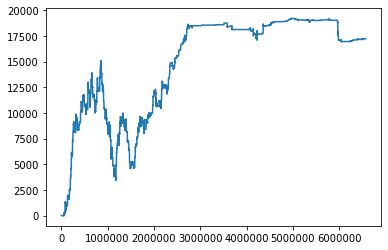

In [24]:
plt.plot(wheel_position)

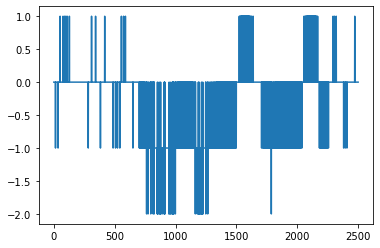

In [61]:
#plt.plot(trials_df['stim contrast left'])
#plt.plot(trials_df['stim contrast right'])
#plt.plot(trials_df['response choice'])

test = np.cumsum(trials_df['wheel movement'])
plt.plot(trials_df['wheel movement'][1])



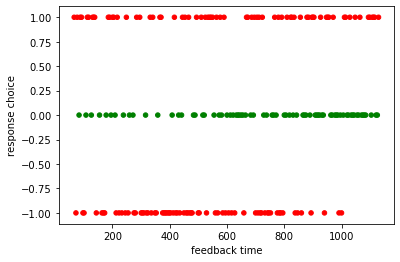

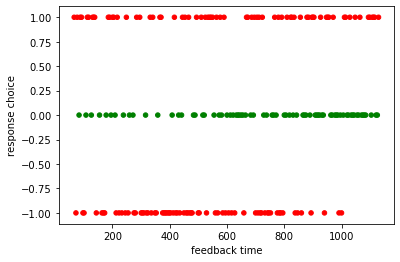

In [240]:
#scatter plot divided by colors according to 
df = trials_df
df.plot.scatter(x='feedback time', y='response choice', s=20, c=np.where(df['response choice'], 'r', 'g'), grid=False)
df.plot.scatter(x='feedback time', y='response choice', s=20, c=np.where(df['response choice'], 'r', 'g'), grid=False)
plt.show()

0      2.369125
1      2.781865
2      1.449478
3      2.231610
4      1.299156
         ...   
209    0.581641
210    0.715252
211    0.431463
212    0.344811
213    0.688081
Length: 214, dtype: float64
0.32721510941570386
8.298038045912165


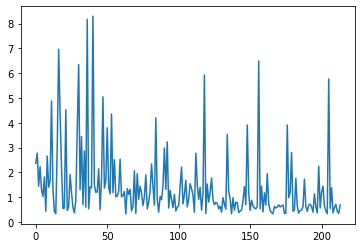

In [215]:
go_cues_diff = ((trials_df['stim time'] - trials_df['go cue']))
print(go_cues_diff)
print(min(go_cues_diff)) #0.49
print(max(go_cues_diff)) #1.19 
plt.plot(go_cues_diff)

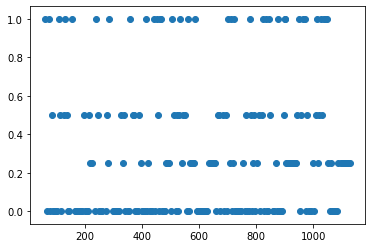

In [281]:
plt.scatter(trial_df.trials_intervals, trial_df.trials_vStim_cLeft)

In [218]:
# create new variable with true where all the contrast left is 0
is_0 =  trial_df['trials_vStim_cLeft'] ==0


# create new variable with true where all the contrast is 0 in both - NoGo trials
is_0_RL = (trial_df['trials_vStim_cLeft']==0) & (trial_df['trials_vStim_cRight']==0)
print(is_0_RL.head())

len(is_0_RL)

0    False
1    False
2    False
3     True
4    False
dtype: bool


214

In [219]:
# filter data by creating a new dataframe


In [220]:
# difference between consecutive rows - trials_intervals
# https://pythontic.com/pandas/dataframe-computations/difference

trials_intervals_diff = trial_df.trials_intervals.diff()

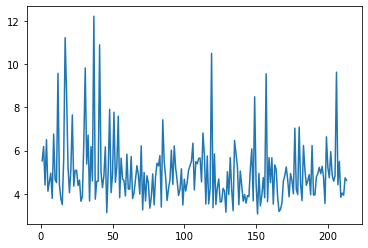

In [221]:
plt.plot(trials_intervals_diff)

In [256]:
# https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values

# Create data frame only with the NoGo
trial2_df = trial_df.loc[(trial_df['trials_vStim_cLeft'] == 0) & (trial_df['trials_vStim_cRight']==0)]
trial2_df.head()

,trials_resp_choice,trials_resp_times,trials_goCue_times,trials_vStim_cLeft,trials_vStim_cRight,trials_vStim_times,trials_intervals,trials_feedback_times,trials_feedbackType,trials_included,trials_repNum
3,0.0,83.502065,81.996875,0.0,0.0,81.235263,79.003653,83.531699,1.0,True,1.0
5,1.0,92.167720,91.837432,0.0,0.0,90.650613,89.617592,92.197438,-1.0,True,1.0
6,-1.0,97.117508,96.572307,0.0,0.0,95.984298,94.167702,97.126316,-1.0,True,2.0
7,-1.0,100.900586,100.157164,0.0,0.0,99.550755,99.117619,100.907576,-1.0,True,3.0
8,0.0,107.663576,106.157660,0.0,0.0,105.566451,102.902255,107.704085,1.0,True,4.0
11,0.0,126.403458,124.897959,0.0,0.0,123.716340,118.833840,126.433983,1.0,True,1.0
16,0.0,154.949572,153.444014,0.0,0.0,152.697202,145.730701,154.979639,1.0,True,1.0
18,-1.0,168.863679,168.598656,0.0,0.0,167.830244,165.596946,168.872260,-1.0,True,1.0
19,-1.0,172.913387,172.534318,0.0,0.0,171.412701,170.863626,172.915924,-1.0,True,2.0
20,0.0,178.034969,176.529182,0.0,0.0,175.479965,174.913822,178.065607,1.0,True,3.0


In [ ]:
#plt.plot(trial_df.trials_feedbackType)
trial_df.trials_feedbackType

df4 = trial_df['trials_feedbackType']({'a': trial_df['trials_feedbackType'] == 1, 'b': trial_df['trials_feedbackType'] == -1})
plt.figure();
ax = df4.plot.area()


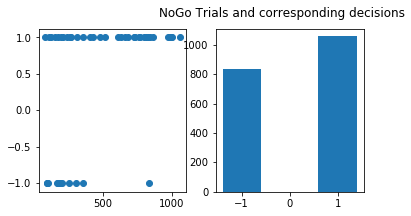

In [278]:
#https://matplotlib.org/3.3.0/tutorials/introductory/pyplot.html

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.scatter(trial2_df['trials_vStim_times'],trial2_df['trials_feedbackType'])

plt.subplot(132)
plt.bar(trial2_df['trials_feedbackType'], trial2_df['trials_vStim_times'],)

plt.suptitle('NoGo Trials and corresponding decisions')
plt.show()

#plt.scatter(trial2_df['trials_vStim_times'],trial2_df['trials_feedbackType'])

#plotting, within 0 contrast (NoGo trials), how many times they did false positives, i.e., turned the wheel 


# Wheel

In [ ]:
# add wheelmovement
print(session['wheel_position'].shape)
print(session['wheel_timestamps'].shape)
print(session['wheelMoves_intervals'].shape)
print(session['wheelMoves_type'].shape)

'''
0 for 'flinches' or otherwise unclassified movements, 
1 for left/clockwise turns, 
2 for right/counter-clockwise turns 
(where again "left" means "would be the correct direction for a stimulus presented on the left). 
A detected movement is counted as 'left' or 'right' only if it was sufficient amplitude that it would have registered 
a correct response (and possibly did), within a minimum amount of time from the start of the movement. 
Movements failing those criteria are flinch/unclassified type.
'''

In [ ]:
session['wheel_position'][1]

In [ ]:
wheel_df = pd.merge( pd.DataFrame(session['wheelMoves_intervals']), pd.DataFrame(session['wheelMoves_type']), how='left', left_index=True, right_index=True)

In [ ]:
wheel_df

In [ ]:
## Duration of the wheel movement - wheel_mov_dur

#duration of the wheel movement
wheel_mov_dur = wheel_df[1]-wheel_df['0_x'] 
wheel_mov_dur
wheelMoves_type1 = session['wheelMoves_type']


#create empty array of given length; bar plot
##create var wheel_Moves_type2 where 0 is L and 1 is R
wheelMoves_type2 = [0] * (len(wheelMoves_type1))
for i in range(len(wheelMoves_type1)):
    if wheelMoves_type1[i] == 0: 
        wheelMoves_type2[i] = 'unclassified'
        #print('0')
    elif wheelMoves_type1[i] == 1:
        wheelMoves_type2[i] = 'left'
        #print('1')
    else:
        wheelMoves_type2[i] = 'right'
        #print('2')    

        
colors = {'unclassified':'red', 'left':'blue', 'right':'green'}

#plot the figure 
plt.figure(figsize=(9, 3))

plt.subplot(131)
#plt.plot(wheel_mov_time2)

plt.subplot(132)
plt.bar(wheelMoves_type2,wheel_mov_dur)

plt.subplot(133)

#plt.plot(wheel_mov_time2)

plt.suptitle('Title')
plt.show()


#for i in range(len(test1)):
#    if test1[i] == 0: 
#        print('0')
#    else: 
#        print('1')

In [18]:
len(trials_df['wheel movement'][1])

2500

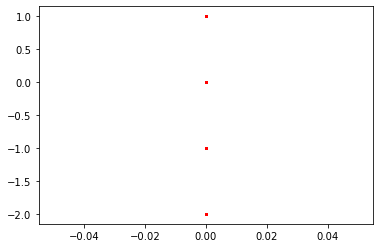

In [22]:

for i in range(len(trials_df['wheel movement'][1])): 

    plt.plot(trials_df['wheel movement'][1][i], 'ro',markersize=1)

# Old stuff or useful code/links

In [30]:







##To adjust the size of one figure:

#import matplotlib.pyplot as plt

#fig=plt.figure(figsize=(15, 15))
#To change the default settings, and therefore all your plots:

#import matplotlib.pyplot as plt

#plt.rcParams['figure.figsize'] = [15, 15]

Useful links: 

data: 
https://www.w3resource.com/pandas/dataframe/dataframe-plot-area.php
https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values
https://www.delftstack.com/howto/python-pandas/how-to-create-an-empty-column-in-pandas-dataframe/

loop issues: 
https://www.datacamp.com/community/tutorials/for-loops-in-python?utm_source=adwords_ppc&utm_campaignid=898687156&utm_adgroupid=48947256715&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=332602034349&utm_targetid=dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1011752&gclid=EAIaIQobChMIkfT0pKXj6gIVhIbVCh0ctg9-EAAYASAAEgKCSvD_BwE


plot: 
https://matplotlib.org/3.3.0/tutorials/introductory/pyplot.html
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html


In [ ]:
## JUST TO CHECK THE WHAT THE DIFF VARS MEAN
# pars trials info =================================
# create spike_df tataframe, with each spike time and the cluster it belongs to
trial_df = pd.DataFrame( 
    { 'trials_resp_choice':session['trials_response_choice'][:,0], #-1 for Right choice (i.e. correct when stimuli are on the right); +1 for left choice; 0 for Nogo choice. Note that in a small percentage of cases (~4%, see manuscript Methods) the initial wheel turn was in the opposite direction. 
    'trials_resp_times': session['trials_response_times'][:,0], 
     
    'trials_goCue_times': session['trials_goCue_times'][:,0] ,#auditory cue
     
    'trials_vStim_cLeft': session['trials_visualStim_contrastLeft'][:,0], #A value of 0.5 means 50% contrast. 0 is a blank screen: no change to any pixel values on that side (completely undetectable).
    'trials_vStim_cRight': session['trials_visualStim_contrastRight'][:,0], 
    'trials_vStim_times': session['trials_visualStim_times'][:,0], 

    'trials_intervals': session['trials_intervals'][:,0], 
                                                
    'trials_feedback_times': session['trials_feedback_times'][:,0],
    'trials_feedbackType': session['trials_feedbackType'][:,0], # -1 negative - noise; 1 positive - water
    
    'trials_included': session['trials_included'][:,0], #Importantly, while this variable gives inclusion criteria according to the definition of disengagement (see manuscript Methods), it does not give inclusion criteria based on the time of response, as used for most analyses in the paper.
    'trials_repNum': session['trials_repNum'][:,0], #Trials are repeated if they are "easy" trials (high contrast stimuli with large difference between the two sides, or the blank screen condition) and this keeps track of how many times the current trial's condition has been repeated.
    },
                       )
#????? 
# add spikes to session dictionary
session['trial_df']=trial_df

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Neuromatch-Academy-Project---Steinmetz-Dataset---Mouse-Mind-Reading" data-toc-modified-id="Neuromatch-Academy-Project---Steinmetz-Dataset---Mouse-Mind-Reading-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Neuromatch Academy Project - Steinmetz Dataset - Mouse Mind Reading</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#explore-dictionary-for-session" data-toc-modified-id="explore-dictionary-for-session-1.0.0.1"><span class="toc-item-num">1.0.0.1&nbsp;&nbsp;</span>explore dictionary for session</a></span></li></ul></li></ul></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load Data</a></span><ul class="toc-item"><li><span><a href="#via-oneibl-by-client" data-toc-modified-id="via-oneibl-by-client-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>via oneibl by client</a></span></li><li><span><a href="#via-google-drive-directly" data-toc-modified-id="via-google-drive-directly-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>via google drive directly</a></span></li><li><span><a href="#cleanup-channel-infos" data-toc-modified-id="cleanup-channel-infos-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>cleanup channel infos</a></span></li><li><span><a href="#cleaning-up-spikes" data-toc-modified-id="cleaning-up-spikes-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>cleaning up spikes</a></span></li><li><span><a href="#cleanup-trial-info" data-toc-modified-id="cleanup-trial-info-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>cleanup trial info</a></span></li></ul></li></ul></li></ul></div>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import matplotlib.pyplot as plt

from nma_class_k import NMA_project
#from nma_class_Copy1 import NMA_project

%matplotlib inline

In [ ]:
# only if you are on jupyter notebook not if on colab
#import qgrid 

In [ ]:
# link to parent folder with all datasets
#main_folder = "/content/gdrive/My Drive/3 Projekte/Neuromatch Summer School/Projekt/steinmetz_dataset"
#main_folder = "C:/Users/User/Google Drive/3 Projekte/Neuromatch Summer School/Projekt/steinmetz_dataset"
#main_folder = "Z:/3 Projekte/Neuromatch Summer School/Projekt/steinmetz_dataset"
main_folder = '/Volumes/GoogleDrive/My Drive/NMA_Dataset/Dataset_1'

# create session object
nma_obj = NMA_project(main_folder) 

# default session is initialized, extract interesting dataframes in dedicated variables
#session = nma_obj.std_session
#channels_df = session['channels_df']
#spikes_df = session['spikes_df']
#clusters_df = session['clusters_df']
#trials_df = session['trials_df']





channels_df = session['channels_df']
spikes_df = session['spikes_df']
clusters_df = session['clusters_df']
trials_df = session['trials_df']
spikes_ar = session['spikes_ar']

#### explore dictionary for session
- each ession is a dictionary
- each element kontains eather a numpy array or a dataframe
- the most important dataframes we are going to work with are:
    - clusters_df: all the spikes and clusters
    - trials_df: all the behaviour data for all trials

In [ ]:
#how to pick a new variable from dataset "session"
some_var = session['spontaneous_intervals']
#print(len(some_var))
#some_var

In [ ]:
for key in nma_obj.std_session.keys():
    print(key)